In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_excel('droppednulls.xlsx', index_col = 0)

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

In [12]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

In [13]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4476
Egypt          7354
France         4768
Germany        2515
Iran           5840
Jordan         5801
Netherlands    2026
Sweden         2989
Turkey         5596
dtype: int64


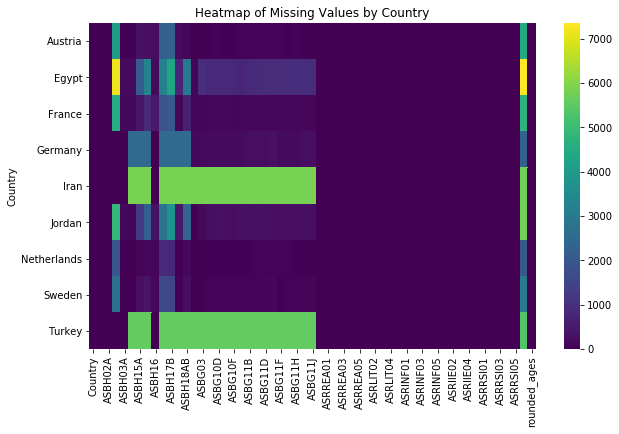

In [14]:
# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

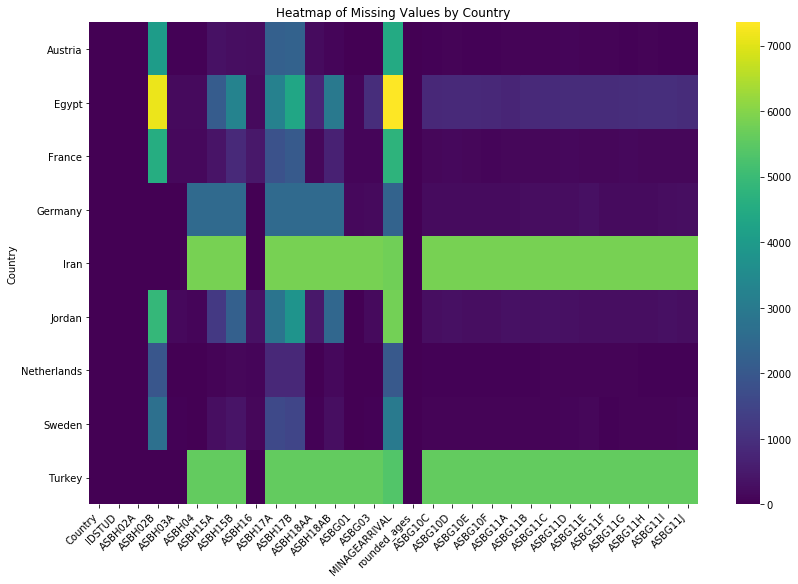

In [15]:
# Select the columns from the DataFrame
df_selected = df[non_assessment_score_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

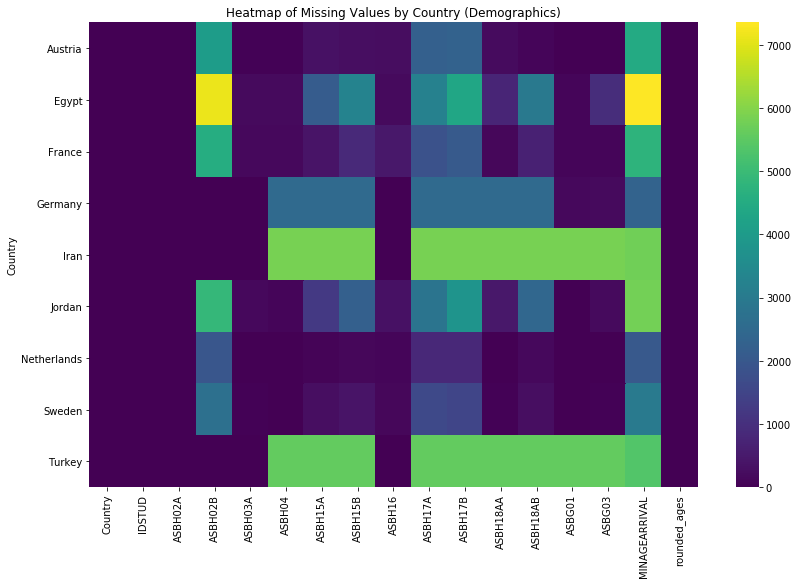

In [16]:
df_demographic = df[demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

Now let's look at the experience in school columns in more detail.

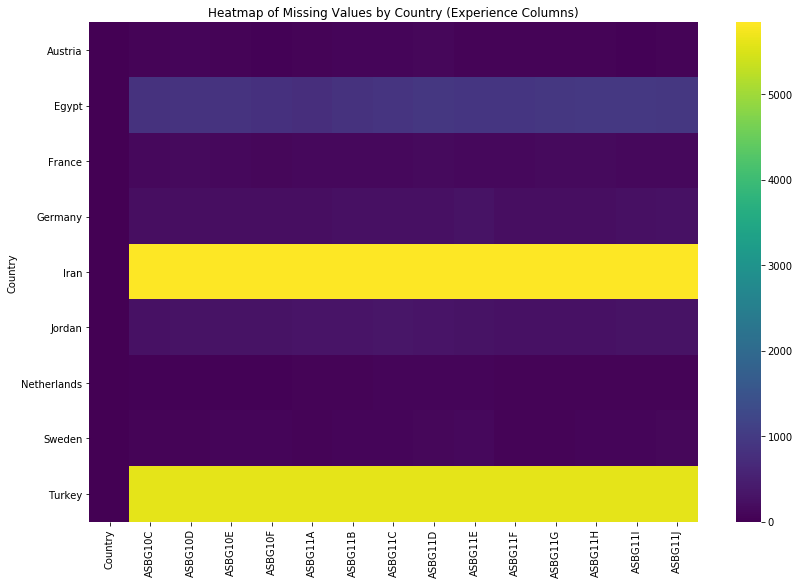

In [23]:
df_experience = df[experience_in_school_columns]

# Perform the Groupby Operation
grouped_selection_experience = df_experience.groupby('Country')

# Aggregate with isnull
missing_values_experience = grouped_selection_experience.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
experienceheatmap = sns.heatmap(missing_values_experience, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Experience Columns)')
plt.show()

So both **Iran** and **Turkey** are missing all data on experiences of children in school, which is a shame. However it would be nice to compare childrens experiences across the other countries. **I want a pivot table like the ones above but with the experiences columns instead of literacy scores, etc.**

I want to explore these gaps in the Iran and Turkey data a little more. However, first I am going to look at **Egypt** in more detail. The total number of rows for **Egypt** is 7354. This is helpful to see how many values are missing across the columns.

In [18]:
missing_values_for_egypt = missing_values_demographic.loc['Egypt']
print(missing_values_for_egypt)

Country             0
IDSTUD              0
ASBH02A             0
ASBH02B          7134
ASBH03A           179
ASBH04            194
ASBH15A          2114
ASBH15B          3280
ASBH16            180
ASBH17A          3196
ASBH17B          4342
ASBH18AA          766
ASBH18AB         2983
ASBG01             95
ASBG03            925
MINAGEARRIVAL    7354
rounded_ages        1
Name: Egypt, dtype: int64


Now I want to explore if the child's immigrant status in each country plays a role in data being missing. Let's first start by understanding how many children are in each group for each country.

In [19]:
# Apply value_counts() to the 'ASBH02A' column for each group
value_counts_per_group = grouped['ASBH02A'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Country         
Austria      Yes    4025
             No      451
Egypt        Yes    7071
             No      283
France       Yes    4526
             No      242
Germany      Yes    2317
             No      198
Iran         Yes    5720
             No      120
Jordan       Yes    4822
             No      979
Netherlands  Yes    1947
             No       79
Sweden       Yes    2681
             No      308
Turkey       Yes    5366
             No      230
Name: ASBH02A, dtype: int64


Now let's created a pivot table to understand how country and immigrant status affect the number of missing values. 

In [25]:
pivot_table_test = df_selected.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [26]:
print(pivot_table_test)

                     ASBG01  ASBG03  ASBG10C  ASBG10D  ASBG10E  ASBG10F  \
Country     ASBH02A                                                       
Austria     No            0       4        8        6        6        5   
            Yes           6      21       49       69       43       35   
Egypt       No            4      39       48       47       47       49   
            Yes          91     886      779      807      814      763   
France      No            6       7       10        8        7        8   
            Yes          90      96      119      139      126      104   
Germany     No           23      24       26       32       30       31   
            Yes         147     167      180      178      182      197   
Iran        No          120     120      120      120      120      120   
            Yes        5720    5720     5720     5720     5720     5720   
Jordan      No            2      21       47       55       47       38   
            Yes          

In [27]:
column_order= ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [29]:
pivot_table_test = pivot_table_test.reindex(column_order, axis=1)

In [30]:
print(pivot_table_test)

                     ASBH02B  ASBH03A  ASBH04  ASBH15A  ASBH15B  ASBH16  \
Country     ASBH02A                                                       
Austria     No             3       11       1       75       63      36   
            Yes         4025       38      40      247      208     219   
Egypt       No            63       27      15      133      174      29   
            Yes         7071      152     179     1981     3106     151   
France      No            16        5       6       64       88      40   
            Yes         4526      167     158      336      752     434   
Germany     No             0        0     198      198      198       0   
            Yes            0        0    2317     2317     2317       0   
Iran        No             0        0     120      120      120       0   
            Yes            1        0    5720     5720     5720       0   
Jordan      No            66       29       8      214      388      81   
            Yes         4

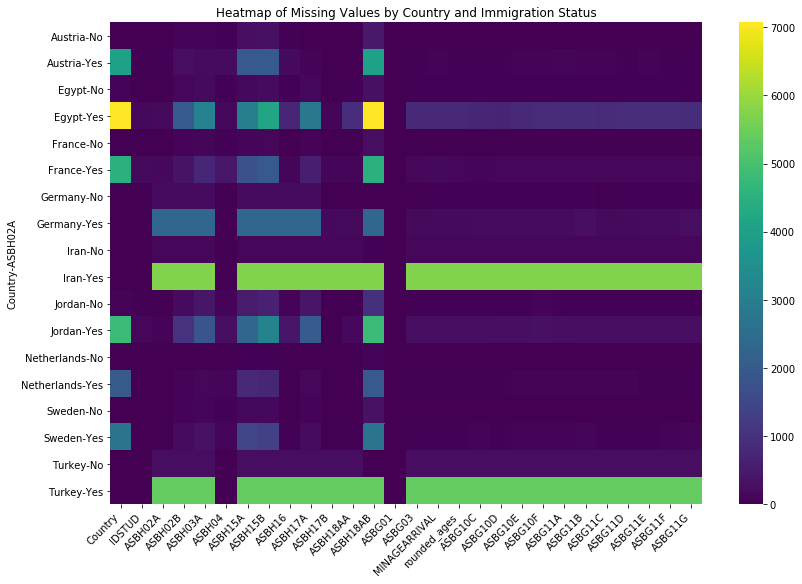

In [31]:
# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap_test = sns.heatmap(pivot_table_test, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap_test.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country and Immigration Status')
plt.show()

There does not seem to be more gaps in the data for those who are not born in the countries where they have taken the test (ASBH02A == No). So that's good. 

We need to be careful as I'm not sure if the heatmap is showing the colours as percentage of possible values or as total values (Some countries will have less possible values than others)

In [32]:
# Calculate the total number of elements in each group
total_counts = df_selected.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

Pivot Table with Percentage of Missing Values:
                         ASBH02B   ASBH03A      ASBH04     ASBH15A     ASBH15B  \
Country     ASBH02A                                                             
Austria     No         0.665188  2.439024    0.221729   16.629712   13.968958   
            Yes      100.000000  0.944099    0.993789    6.136646    5.167702   
Egypt       No        22.261484  9.540636    5.300353   46.996466   61.484099   
            Yes      100.000000  2.149625    2.531467   28.015839   43.925894   
France      No         6.611570  2.066116    2.479339   26.446281   36.363636   
            Yes      100.000000  3.689792    3.490941    7.423774   16.615113   
Germany     No         0.000000  0.000000  100.000000  100.000000  100.000000   
            Yes        0.000000  0.000000  100.000000  100.000000  100.000000   
Iran        No         0.000000  0.000000  100.000000  100.000000  100.000000   
            Yes        0.017483  0.000000  100.000000  100.00

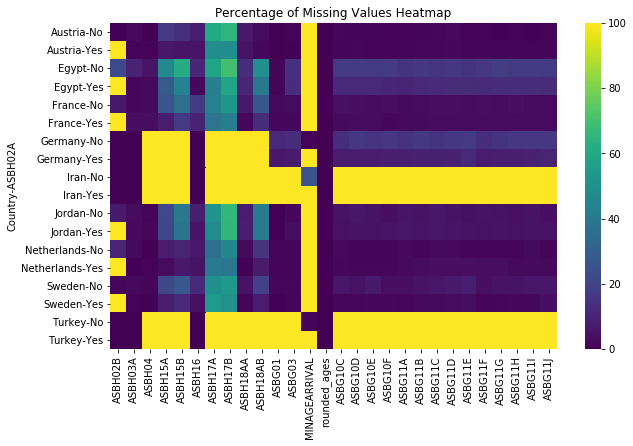

In [33]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

So **Iran** and **Turkey** have no experience data and **Germany** is also missing quite a few columns.

In [38]:
grouped["ASBH02B"].value_counts(dropna=False)

Country      ASBH02B                 
Austria      NaN                         4028
             3 to 5 years old             175
             Younger than 3 years old     123
             6 to 7 years old              91
             8 years old or older          59
Egypt        NaN                         7134
             Younger than 3 years old     113
             3 to 5 years old              42
             6 to 7 years old              40
             8 years old or older          25
France       NaN                         4542
             Younger than 3 years old      81
             3 to 5 years old              71
             6 to 7 years old              49
             8 years old or older          25
Germany      6                           2317
             2                             75
             1                             53
             3                             36
             4                             32
             9                            

In [40]:
double_grouped = df_selected.groupby(['Country','ASBH02A'])          

In [42]:
double_grouped["ASBH02B"].value_counts(dropna=False)

Country      ASBH02A  ASBH02B                 
Austria      No       3 to 5 years old             175
                      Younger than 3 years old     123
                      6 to 7 years old              91
                      8 years old or older          59
                      NaN                            3
             Yes      NaN                         4025
Egypt        No       Younger than 3 years old     113
                      NaN                           63
                      3 to 5 years old              42
                      6 to 7 years old              40
                      8 years old or older          25
             Yes      NaN                         7071
France       No       Younger than 3 years old      81
                      3 to 5 years old              71
                      6 to 7 years old              49
                      8 years old or older          25
                      NaN                           16
             Yes  

I need to clean up the 6s in this column as they also represent NA, I believe.

In [44]:
double_grouped["ASBH03A"].value_counts(dropna=False)

Country      ASBH02A  ASBH03A
Austria      No       No          253
                      Yes         187
                      NaN          11
             Yes      Yes        3731
                      No          256
                      NaN          38
Egypt        No       Yes         240
                      NaN          27
                      No           16
             Yes      Yes        6854
                      NaN         152
                      No           65
France       No       Yes         119
                      No          118
                      NaN           5
             Yes      Yes        4262
                      NaN         167
                      No           97
Germany      No       No          102
                      Yes          77
                      9            19
             Yes      Yes        2141
                      9           132
                      No           44
Iran         No       Yes          89
                    

In [45]:
double_grouped["ASBH04"].value_counts(dropna=False)

Country      ASBH02A  ASBH04
Austria      No       3.0        199
                      2.0        148
                      1.0         61
                      4.0         42
                      NaN          1
             Yes      1.0       3020
                      2.0        561
                      3.0        367
                      NaN         40
                      4.0         37
Egypt        No       1.0        184
                      2.0         42
                      3.0         34
                      NaN         15
                      4.0          8
             Yes      1.0       4923
                      3.0        998
                      2.0        726
                      4.0        245
                      NaN        179
France       No       1.0        110
                      2.0         74
                      3.0         48
                      NaN          6
                      4.0          4
             Yes      1.0       4076
         

In [46]:
double_grouped["ASBH15A"].value_counts(dropna=False)

Country      ASBH02A  ASBH15A
Austria      No       4.0         125
                      NaN          75
                      8.0          74
                      3.0          49
                      6.0          39
                      9.0          28
                      7.0          27
                      2.0          23
                      10.0          5
                      1.0           4
                      5.0           2
             Yes      4.0        1749
                      6.0         680
                      8.0         652
                      NaN         247
                      3.0         242
                      9.0         195
                      7.0         134
                      10.0         52
                      5.0          35
                      2.0          29
                      1.0          10
Egypt        No       NaN         133
                      4.0          38
                      7.0          27
                    

In [48]:
double_grouped["ASBH16"].value_counts(dropna=False)

Country      ASBH02A  ASBH16
Austria      No       6.0        164
                      2.0        101
                      5.0         71
                      4.0         68
                      NaN         36
                      1.0         11
             Yes      6.0       1246
                      2.0       1110
                      4.0        975
                      5.0        433
                      NaN        219
                      1.0         42
Egypt        No       6.0         97
                      5.0         63
                      NaN         29
                      1.0         26
                      3.0         26
                      4.0         22
                      2.0         20
             Yes      5.0       2760
                      6.0       2084
                      4.0        900
                      3.0        500
                      2.0        465
                      1.0        211
                      NaN        151
France   

"ASBH16" is hopes for child's level of education - most parents seem to have answered this.

Germany, Iran and Turkey have not answered any questions on how often lang of test spoken at home (4) parents' level of edu 15,  professions 17, level of language 18. Iran and Turkey have also not answered sex of child G01 or how often child says lang spoken at home G03.

## It would be interesting to compare child and parents' experience of lang of test spoken at home.

Where is age in all this??

You did well today, bravo!